In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

/opt/anaconda3/envs/mis584projenv/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
df = pd.read_csv("../data/landslideCleaned.csv")
df['event_date'] = pd.to_datetime(df['event_date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   event_id                   5351 non-null   int64         
 1   event_date                 5351 non-null   datetime64[ns]
 2   event_year                 5351 non-null   int64         
 3   event_month                5351 non-null   object        
 4   event_time                 5351 non-null   object        
 5   event_hour                 5351 non-null   int64         
 6   event_am_pm                5351 non-null   object        
 7   landslide_category         5351 non-null   object        
 8   landslide_trigger          5351 non-null   object        
 9   landslide_size             5351 non-null   object        
 10  landslide_setting          5351 non-null   object        
 11  fatality_count             5351 non-null   float64       
 12  injury

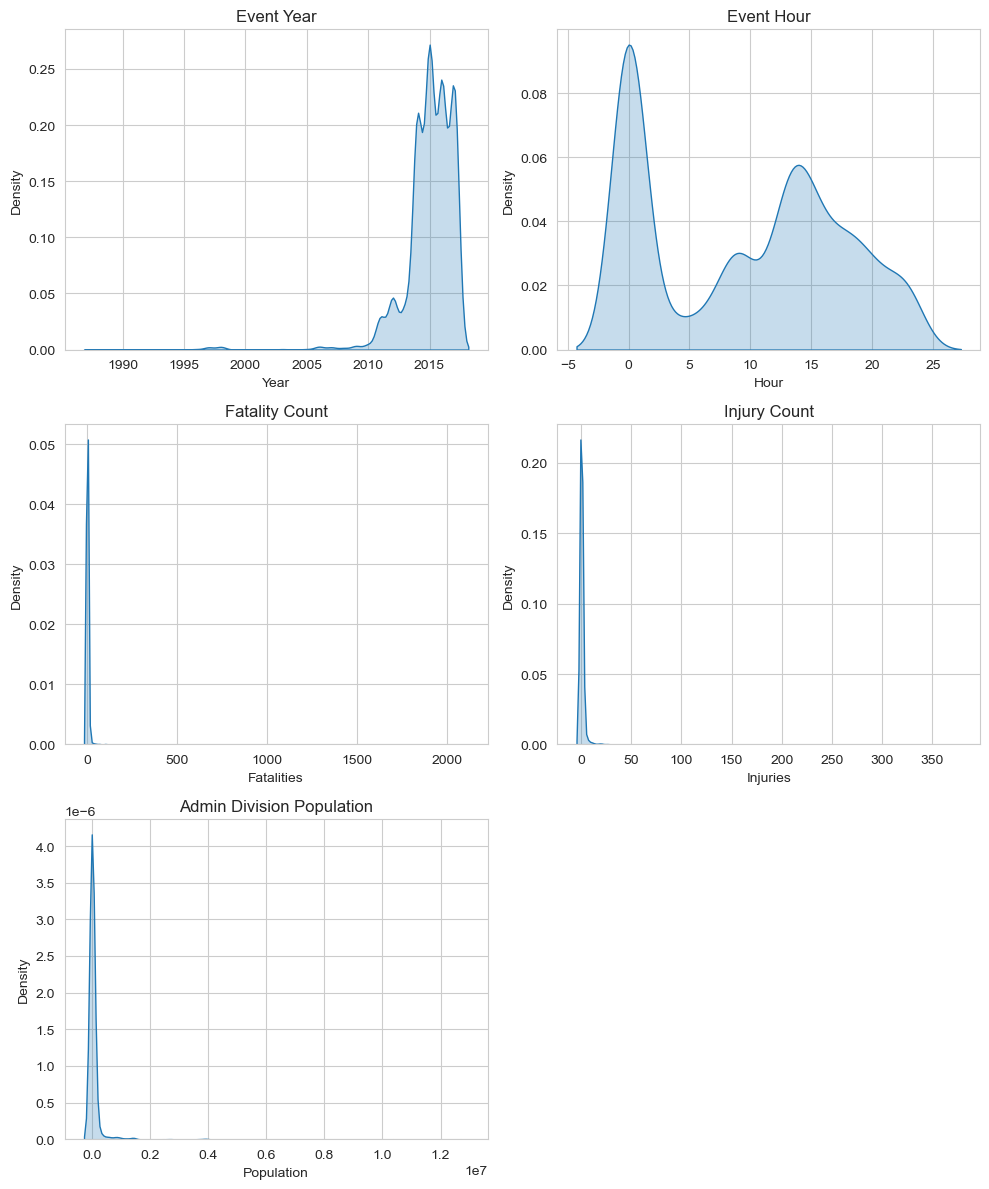

In [23]:
fig, axes = plt.subplots(3, 2, figsize = (10, 12))

sns.kdeplot(df['event_year'], ax = axes[0,0], fill = True)
axes[0,0].set_title("Event Year")
axes[0,0].set_xlabel("Year")

sns.kdeplot(df['event_hour'], ax = axes[0,1], fill = True)
axes[0,1].set_title("Event Hour")
axes[0,1].set_xlabel("Hour")

sns.kdeplot(df['fatality_count'], ax = axes[1,0], fill = True)
axes[1,0].set_title("Fatality Count")
axes[1,0].set_xlabel("Fatalities")

sns.kdeplot(df['injury_count'], ax = axes[1,1], fill = True)
axes[1,1].set_title("Injury Count")
axes[1,1].set_xlabel("Injuries")

sns.kdeplot(df['admin_division_population'], ax = axes[2,0], fill = True)
axes[2,0].set_title("Admin Division Population")
axes[2,0].set_xlabel("Population")

axes[2,1].axis('off')

plt.tight_layout()
plt.show()


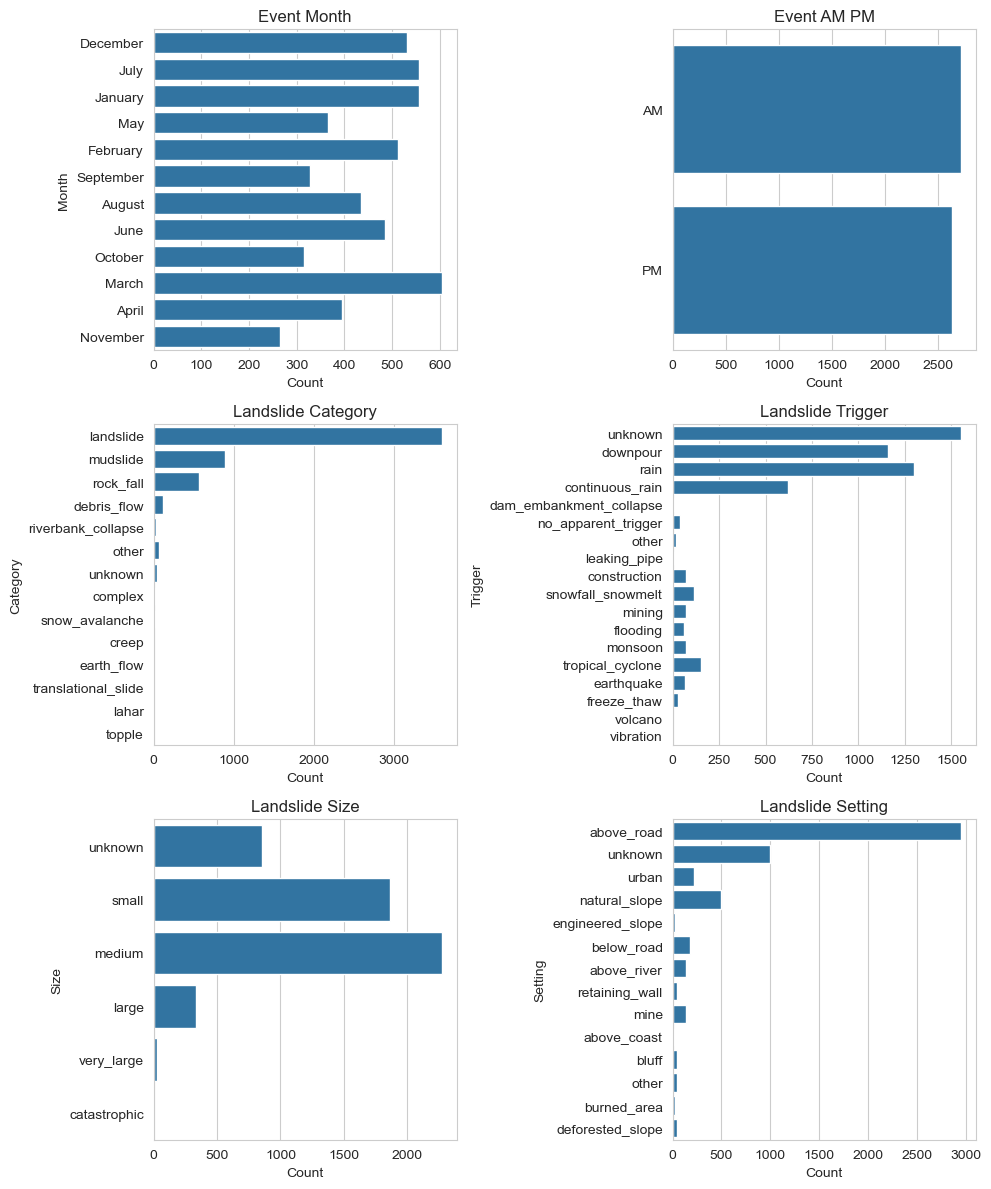

In [41]:
fig, axes = plt.subplots(3, 2, figsize = (10, 12))

sns.countplot(df, y = 'event_month', ax = axes[0,0])
axes[0,0].set_title("Event Month")
axes[0,0].set_xlabel("Count")
axes[0,0].set_ylabel("Month")

sns.countplot(df, y = 'event_am_pm', ax = axes[0,1])
axes[0,1].set_title("Event AM PM")
axes[0,1].set_xlabel("Count")
axes[0,1].set_ylabel("")

sns.countplot(df, y = 'landslide_category', ax = axes[1,0])
axes[1,0].set_title("Landslide Category")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Category")

sns.countplot(df, y = 'landslide_trigger', ax = axes[1,1])
axes[1,1].set_title("Landslide Trigger")
axes[1,1].set_xlabel("Count")
axes[1,1].set_ylabel("Trigger")

sns.countplot(df, y = 'landslide_size', ax = axes[2,0])
axes[2,0].set_title("Landslide Size")
axes[2,0].set_xlabel("Count")
axes[2,0].set_ylabel("Size")

sns.countplot(df, y = 'landslide_setting', ax = axes[2,1])
axes[2,1].set_title("Landslide Setting")
axes[2,1].set_xlabel("Count")
axes[2,1].set_ylabel("Setting")

plt.tight_layout()
plt.show()


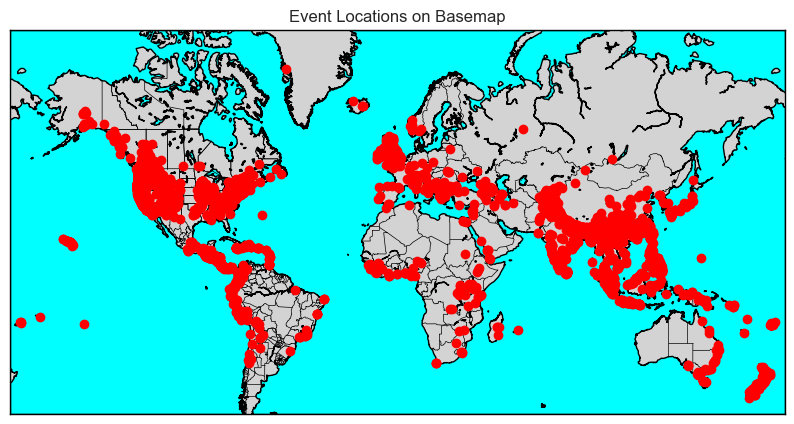

In [29]:

plt.figure(figsize=(10, 6))


m = Basemap(projection="merc", llcrnrlat=df["latitude"].min()-5, urcrnrlat=df["latitude"].max()+5,
            llcrnrlon=df["longitude"].min()-5, urcrnrlon=df["longitude"].max()+5, resolution="l")

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color="lightgray", lake_color="aqua")
m.drawmapboundary(fill_color="aqua")

# Convert latitude and longitude to map coordinates
x, y = m(df["longitude"].values, df["latitude"].values)

# Plot the points
m.scatter(x, y, marker="o", color="red", zorder=5)

# Add a title
plt.title("Event Locations on Basemap")

# Show the plot
plt.show()

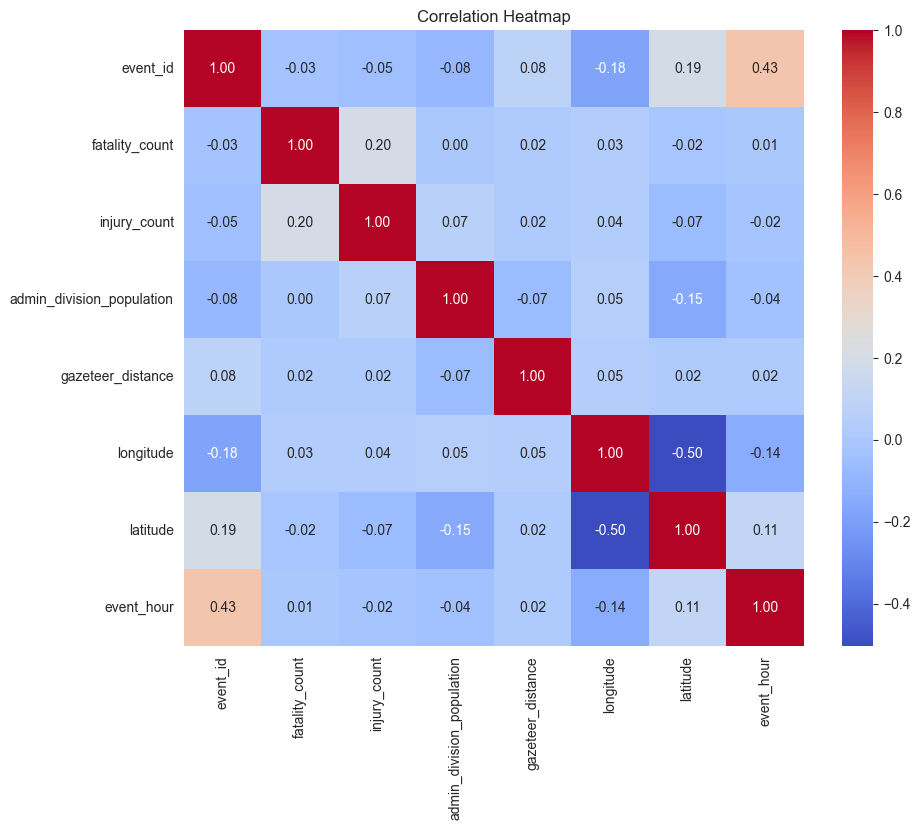

In [21]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

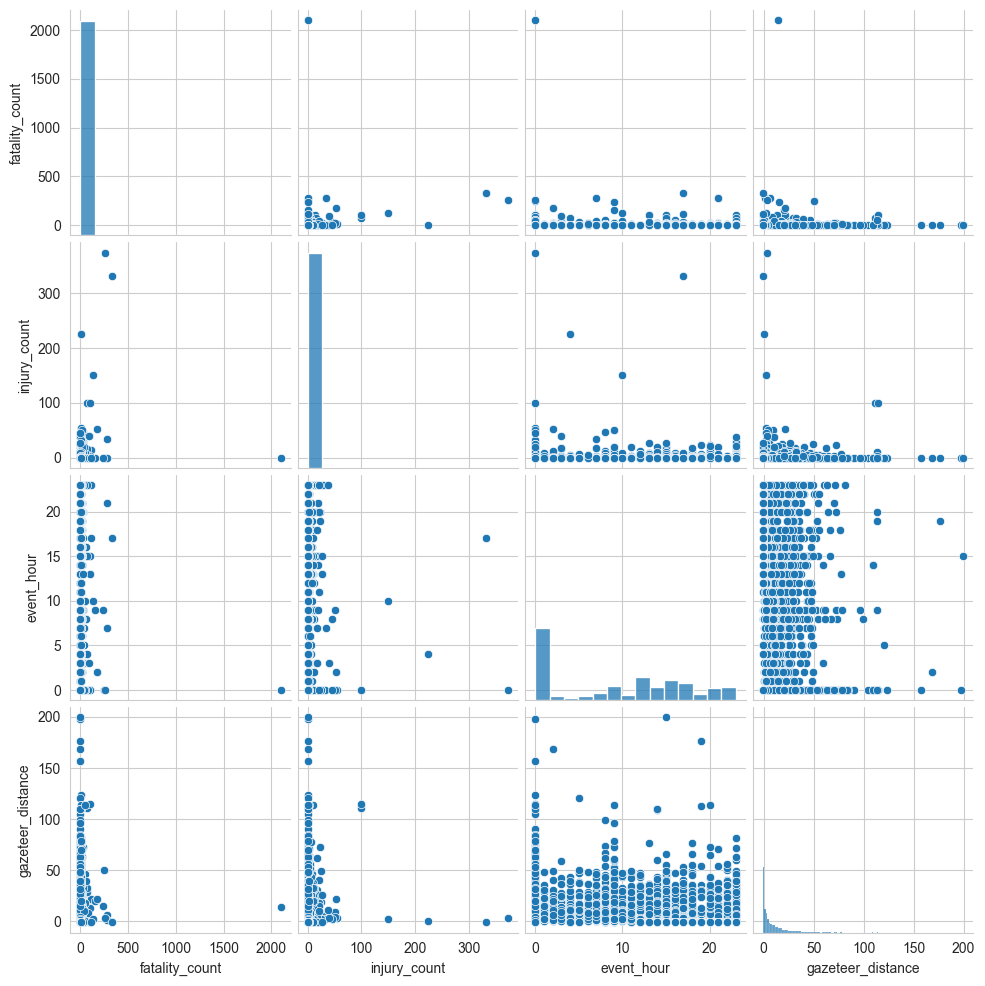

In [34]:
sns.pairplot(df[['fatality_count', 'injury_count', 'event_hour', 'gazeteer_distance']])
plt.show()